# Sampling assignment 3

In [1]:
import pandas as pd
import numpy as np
import math as mt

In [2]:
data = pd.read_csv("Creditcard_data.csv")

In [3]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,575,-0.572263,0.731748,1.541254,0.150506,1.108974,0.372152,1.084879,-0.146329,-0.274447,...,-0.143508,-0.107582,-0.418263,-0.731029,0.877525,-0.364150,-0.177509,-0.256545,26.72,0
768,579,-1.296845,-0.511605,2.404726,-0.310762,-0.319551,-0.542842,-0.173310,0.260423,-1.202688,...,-0.071270,-0.161175,0.088496,0.285390,0.281069,-0.370130,0.043410,0.092318,80.00,0
769,579,1.214170,0.210481,0.484651,0.479768,-0.261955,-0.527039,0.021782,-0.106888,-0.037631,...,-0.224292,-0.594609,0.159877,0.091873,0.140964,0.227406,-0.017389,0.016030,5.98,0
770,580,1.267030,-0.071114,0.037680,0.512683,0.242392,0.705212,-0.226582,0.109483,0.657565,...,-0.164468,-0.177225,-0.222918,-1.245505,0.678360,0.525059,0.002920,-0.003333,12.36,0


In [4]:
y = data["Class"]
X = data[data.columns.drop("Class")]

In [5]:
#!conda install -y imbalanced-learn

In [6]:
from imblearn.over_sampling import SMOTE

In [7]:
smote = SMOTE()

In [8]:
# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

In [9]:
y_smote.value_counts()

0    763
1    763
Name: Class, dtype: int64

In [10]:
y.value_counts()

0    763
1      9
Name: Class, dtype: int64

## creating random sample

In [11]:
# Perform random sampling
sample_size = 100  # desired sample size
x_s1 = x_smote.sample(n=sample_size, random_state=42)  # random sampling with seed 42
y_s1 = y_smote.sample(n=sample_size, random_state=42)

In [12]:
print(x_s1,y_s1)

      Time        V1        V2        V3        V4        V5        V6  \
1439   510 -1.567349 -1.326610  2.173881  0.753328  1.857867 -0.009737   
76      49 -0.549626  0.418949  1.729833  0.203065 -0.187012  0.253878   
1010   131  0.904835  0.409773  0.346759  0.521796 -0.017539 -0.678598   
660    499  1.255439  0.307729  0.292700  0.699873 -0.428876 -1.088456   
1132   538 -0.251057 -0.870708  0.581068  1.251179  0.244699 -1.066549   
...    ...       ...       ...       ...       ...       ...       ...   
988    494 -2.088680 -1.238085  1.314492  1.948031  1.618312  0.022936   
570    427 -0.847312  0.854261  0.338816  0.890137  0.804751  1.165501   
1124   448 -1.543446 -1.824035  2.022988  0.914124  2.100762  0.518713   
1163   143  0.590687  0.463152  0.386486  0.368062  0.300065 -0.327138   
654    495 -0.239505 -3.940241 -0.147576 -0.671347 -2.239256  0.908178   

            V7        V8        V9  ...       V20       V21       V22  \
1439 -0.902724  0.406649  0.514100  ..

## systematic sampling

In [13]:
# Define the sampling interval
interval = mt.floor(x_smote.shape[0]/100)
# Determine the starting point
start = 5
# Perform systematic sampling
x_s2 = x_smote.iloc[start::interval]
y_s2 = y_smote.iloc[start::interval]
# View the sampled data
print(x_s2,y_s2)

      Time        V1        V2        V3        V4        V5        V6  \
5        2 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728   
20      16  0.694885 -1.361819  1.029221  0.834159 -1.191209  1.309109   
35      26 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
50      35  1.199356  0.129953  0.863585  1.002635 -0.783761 -0.884679   
65      44 -0.899992  0.136255  1.883665 -0.208996  1.051441  1.905241   
...    ...       ...       ...       ...       ...       ...       ...   
1460   473 -0.867667  0.396868  1.701313  0.196801  0.929358 -0.905688   
1475   145  0.538435  0.472031  0.393094  0.342491  0.352893 -0.268679   
1490   534 -1.858741 -1.116000  1.774169  0.167404  1.627578  0.114598   
1505     0  1.185846  0.267682  0.168014  0.446363  0.064118 -0.080566   
1520   560  0.269979 -0.502329  0.961789  0.826877  0.497023 -0.563729   

            V7        V8        V9  ...       V20       V21       V22  \
5     0.476201  0.260314 -0.568671  ..

In [14]:
x_s2.shape

(102, 30)

In [15]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,...,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000
mean,283.005181,-0.176963,0.217169,0.875172,0.285628,-0.005029,0.159081,0.123329,-0.057547,-0.030384,...,0.004888,-0.096995,-0.040344,-0.002501,0.114337,0.022782,0.023353,-0.017045,68.668290,0.011658
std,171.834196,1.294724,1.173401,1.031878,1.258758,1.098143,1.225682,0.852075,0.830144,0.878183,...,0.609335,0.607228,0.358724,0.621507,0.429667,0.484227,0.300934,0.278332,197.838269,0.107411
min,0.000000,-6.093248,-12.114213,-5.694973,-4.657545,-6.631951,-3.498447,-4.925568,-7.494658,-2.770089,...,-4.134608,-2.776923,-3.553381,-1.867208,-1.389079,-1.243924,-2.377933,-2.735623,0.000000,0.000000
25%,126.500000,-0.896416,-0.174684,0.308677,-0.460058,-0.534567,-0.630717,-0.296289,-0.167880,-0.517068,...,-0.213746,-0.525289,-0.176915,-0.379766,-0.166227,-0.313631,-0.047868,-0.033083,5.987500,0.000000
50%,282.000000,-0.382618,0.285843,0.905435,0.395919,-0.116612,-0.109581,0.116329,0.034755,-0.082270,...,-0.075802,-0.076551,-0.048353,0.091886,0.143723,-0.026414,0.023199,0.021034,16.665000,0.000000
75%,432.000000,1.110739,0.885745,1.532969,1.117559,0.452818,0.482972,0.575390,0.252395,0.412261,...,0.095149,0.307438,0.070085,0.426339,0.425798,0.260408,0.112199,0.087023,55.527500,0.000000
max,581.000000,1.586093,5.267376,3.772857,4.075817,7.672544,5.122103,4.808426,2.134599,5.459274,...,5.273420,1.574750,3.150413,1.215279,1.136720,3.087444,2.490503,1.575380,3828.040000,1.000000


## stratified sampling

In [19]:
x_s3_0=x_smote[y_smote.iloc[:]==0]
x_s3_1=x_smote[y_smote.iloc[:]==1]
y_s3_0=y_smote[y_smote.iloc[:]==0]
y_s3_1=y_smote[y_smote.iloc[:]==1]

In [22]:
x_s3=x_s3_0.sample(50,random_state=42)
x_s3=x_s3.append(x_s3_1.sample(50,random_state=42))
y_s3=y_s3_0.sample(50,random_state=42)
y_s3=y_s3.append(y_s3_1.sample(50,random_state=42))

/var/folders/w7/588nflw97fjflys51trjr2g40000gn/T/ipykernel_23817/3050891127.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_s3=x_s3.append(x_s3_1.sample(50,random_state=42))
/var/folders/w7/588nflw97fjflys51trjr2g40000gn/T/ipykernel_23817/3050891127.py:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_s3=y_s3.append(y_s3_1.sample(50,random_state=42))


## clustering

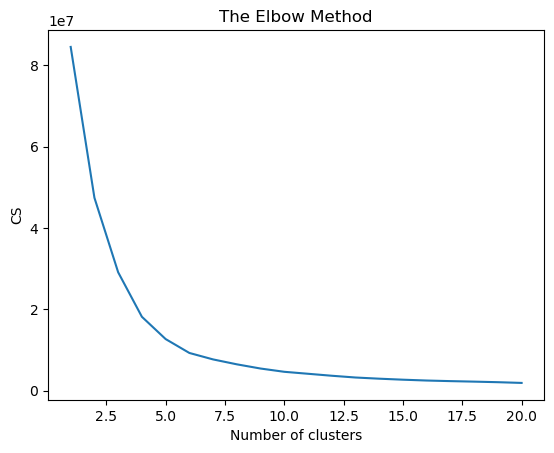

In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
cs = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x_smote)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 21), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [23]:
# from sklearn.cluster import KMeans
# import numpy as np

# # generate some data for clustering


# set the number of clusters
n_clusters = 14

# create KMeans object
kmeans = KMeans(n_clusters=n_clusters,random_state=42)

# fit the model to the data
kmeans.fit(data)


# # get the cluster labels for each data point
# labels = kmeans.labels_

# # get the coordinates of the cluster centers
# centers = kmeans.cluster_centers_

# print(labels)
# print(centers)

from sklearn.cluster import KMeans
import numpy as np



# # set the number of clusters
# n_clusters = 14

# # create KMeans object
# kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# # fit the model to the data
# kmeans.fit(data)

# get the cluster labels for each data point
labels = kmeans.labels_

# append the cluster labels to the original data
cluster_data = pd.DataFrame({'Cluster': labels})

# concatenate the original dataframe with the new dataframe containing the cluster labels
data_with_clusters = pd.concat([data, cluster_data], axis=1)

# print the first few rows of the data with the cluster labels
print(data_with_clusters.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V22       V23       V24       V25       V26  \
0  0.098698  0.363787  ...  0.277838 -0.110474  0.066928  0.128539 -0.189115   
1  0.085102 -0.255425  ... -0.638672  0.101288 -0.339846  0.167170  0.125895   
2  0.247676 -1.514654  ...  0.771679  0.909412 -0.689281 -0.327642 -0.139097   
3  0.377436 -1.387024  ...  0.005274 -0.190321 -1.175575  0.647376 -0.221929   
4 -0.270533  0.817739  ...  0.798278 -0.137458  0.141267 -0.206010  0.502292   

        V27       V28  Amount  C

/Users/rishabhhandoo/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [24]:
data_with_clusters

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Cluster
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,8
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1,13
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,4
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,13
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,575,-0.572263,0.731748,1.541254,0.150506,1.108974,0.372152,1.084879,-0.146329,-0.274447,...,-0.107582,-0.418263,-0.731029,0.877525,-0.364150,-0.177509,-0.256545,26.72,0,1
768,579,-1.296845,-0.511605,2.404726,-0.310762,-0.319551,-0.542842,-0.173310,0.260423,-1.202688,...,-0.161175,0.088496,0.285390,0.281069,-0.370130,0.043410,0.092318,80.00,0,1
769,579,1.214170,0.210481,0.484651,0.479768,-0.261955,-0.527039,0.021782,-0.106888,-0.037631,...,-0.594609,0.159877,0.091873,0.140964,0.227406,-0.017389,0.016030,5.98,0,1
770,580,1.267030,-0.071114,0.037680,0.512683,0.242392,0.705212,-0.226582,0.109483,0.657565,...,-0.177225,-0.222918,-1.245505,0.678360,0.525059,0.002920,-0.003333,12.36,0,1


In [27]:
# loop through the cluster labels and group the data points by their corresponding cluster label
clusters = {}
for i, label in enumerate(labels):
    if label not in clusters:
        clusters[label] = []

In [28]:
p=list(clusters.keys())

In [29]:
import pandas as pd

# create a dictionary of dataframes, one for each cluster
cluster_dfs = {}
for i, data_with_clusters in data_with_clusters.groupby('Cluster'):
    cluster_dfs[i] = pd.DataFrame(data_with_clusters)

# access the dataframe for cluster 0
# cluster_0_df = cluster_dfs[0]


In [30]:
# create an empty list to store the selected rows
selected_rows = []

# iterate over the keys of the dictionary
for key in cluster_dfs.keys():
    # use the sample() method to select 10 random rows from the dataframe
    rows = cluster_dfs[key].sample(n=10, random_state=42,replace=True)
    # append the selected rows to the list
    selected_rows.append(rows)

# concatenate the selected rows into a single dataframe
selected_df = pd.concat(selected_rows)


In [31]:
y_s4=selected_df['Class']

In [32]:
x_s4=selected_df[selected_df.columns.drop("Cluster")]


In [33]:
x_s4=x_s4[x_s4.columns.drop("Class")]

In [35]:
x_s4

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
215,142,1.211406,0.007850,0.950798,1.137646,-0.495189,0.301371,-0.518350,0.095426,0.817592,...,-0.049912,-0.107248,-0.057153,-0.118933,-0.421241,0.556146,-0.360164,0.076930,0.031800,9.99
166,105,1.175094,0.408263,0.552145,1.255068,-0.196662,-0.565605,0.133973,-0.146202,-0.214155,...,-0.116439,0.130585,0.523640,-0.050125,0.448133,0.597867,-0.275067,0.043308,0.023924,1.00
241,162,1.039964,-0.534355,1.865190,1.145122,-1.488133,0.589641,-1.119900,0.382781,1.419160,...,-0.053880,-0.014701,0.430843,-0.071344,0.638434,0.366778,0.451211,0.053840,0.023451,22.00
225,147,-2.687978,4.390230,-2.360483,0.360829,1.310192,-1.645253,2.327776,-1.727825,4.324752,...,3.169344,-1.045961,-0.156951,0.079854,-0.012598,0.207194,-0.536578,0.950393,-0.624431,0.89
175,112,1.102698,0.103965,0.934479,1.152704,-0.693597,-0.584580,-0.148439,-0.112031,0.196750,...,0.037095,-0.017211,-0.098781,0.003331,0.394412,0.334208,-0.520700,0.045952,0.048005,54.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,18,0.247491,0.277666,1.185471,-0.092603,-1.314394,-0.150116,-0.946365,-1.617935,1.544071,...,-0.230983,1.650180,0.200454,-0.185353,0.423073,0.820591,-0.227632,0.336634,0.250475,22.75
113,74,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18
132,83,-1.864990,0.910874,1.724863,-1.748371,0.578943,-0.832531,1.901440,-1.913986,2.112375,...,0.274877,-0.318597,0.073323,-0.061693,0.547204,-0.466798,0.408030,-2.377933,-1.255549,7.69
81,52,1.147369,0.059035,0.263632,1.211023,-0.044096,0.301067,-0.132960,0.227885,0.252191,...,-0.255924,-0.087813,-0.110756,-0.097771,-0.323374,0.633279,-0.305328,0.027394,-0.000580,6.67


# Models 

### model - 1 random forest

In [60]:
m1_acc=[]

In [61]:
##sample 1
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Create a Random Forest classifier object
m1 = RandomForestClassifier()

# Fit the classifier to the training data
m1.fit(x_s1, y_s1)

# Use the classifier to make predictions on the test data
y_pred_m1_s1 = m1.predict(x_smote)

# Evaluate the classifier's accuracy using metrics like accuracy_score
from sklearn.metrics import accuracy_score
m1_acc.append(accuracy_score(y_smote, y_pred_m1_s1))
m1_acc



[0.9783748361730014]

In [62]:
##sample 2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Create a Random Forest classifier object
m1 = RandomForestClassifier()

# Fit the classifier to the training data
m1.fit(x_s2, y_s2)

# Use the classifier to make predictions on the test data
y_pred_m1_s2 = m1.predict(x_smote)

# Evaluate the classifier's accuracy using metrics like accuracy_score
from sklearn.metrics import accuracy_score
m1_acc.append(accuracy_score(y_smote, y_pred_m1_s2))
m1_acc



[0.9783748361730014, 0.9750982961992136]

In [63]:
##sample 3
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Create a Random Forest classifier object
m1 = RandomForestClassifier()

# Fit the classifier to the training data
m1.fit(x_s3, y_s3)

# Use the classifier to make predictions on the test data
y_pred_m1_s3 = m1.predict(x_smote)

# Evaluate the classifier's accuracy using metrics like accuracy_score
from sklearn.metrics import accuracy_score
m1_acc.append(accuracy_score(y_smote, y_pred_m1_s3))
m1_acc



[0.9783748361730014, 0.9750982961992136, 0.9678899082568807]

In [64]:
##sample 4
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Create a Random Forest classifier object
m1 = RandomForestClassifier()

# Fit the classifier to the training data
m1.fit(x_s4, y_s4)

# Use the classifier to make predictions on the test data
y_pred_m1_s4 = m1.predict(x_smote)

# Evaluate the classifier's accuracy using metrics like accuracy_score
from sklearn.metrics import accuracy_score
m1_acc.append(accuracy_score(y_smote, y_pred_m1_s4))
m1_acc



[0.9783748361730014,
 0.9750982961992136,
 0.9678899082568807,
 0.5052424639580603]

### model - 2 logistic regression

In [71]:
m2_acc=[]

In [72]:
# sample 1
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets

# train the model
m2 = LogisticRegression()
m2.fit(x_s1, y_s1)

# make predictions on the test set
y_pred = m2.predict(x_smote)

# evaluate the model
m2_acc.append(m2.score(x_smote, y_smote))
m2_acc

/Users/rishabhhandoo/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0.9141546526867628]

In [73]:
# sample 2
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets

# train the model
m2 = LogisticRegression()
m2.fit(x_s2, y_s2)

# make predictions on the test set
y_pred = m2.predict(x_smote)

# evaluate the model
m2_acc.append(m2.score(x_smote, y_smote))
m2_acc

/Users/rishabhhandoo/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0.9141546526867628, 0.8951507208387942]

In [74]:
# smaple 3
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets

# train the model
m2 = LogisticRegression()
m2.fit(x_s3, y_s3)

# make predictions on the test set
y_pred = m2.predict(x_smote)

# evaluate the model
m2_acc.append(m2.score(x_smote, y_smote))
m2_acc

/Users/rishabhhandoo/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0.9141546526867628, 0.8951507208387942, 0.8971166448230669]

In [75]:
#sample 4
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets

# train the model
m2 = LogisticRegression()
m2.fit(x_s4, y_s4)

# make predictions on the test set
y_pred = m2.predict(x_smote)

# evaluate the model
m2_acc.append(m2.score(x_smote, y_smote))
m2_acc

/Users/rishabhhandoo/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0.9141546526867628, 0.8951507208387942, 0.8971166448230669, 0.562254259501966]

### model - 3 ada boost

In [96]:
m3_acc=[]

In [97]:
#sample 1
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=15, max_depth=10)

# Create an AdaBoost classifier
boost = AdaBoostClassifier(base_estimator=rf, n_estimators=30, learning_rate=0.1)

# Fit the AdaBoost classifier to the training data
boost.fit(x_s1, y_s1)

y_pred = boost.predict(x_smote)
m3_acc.append(accuracy_score(y_smote, y_pred))
m3_acc

/Users/rishabhhandoo/miniforge3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[0.9442988204456094]

In [98]:
#sample 2
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=15, max_depth=10)

# Create an AdaBoost classifier
boost = AdaBoostClassifier(base_estimator=rf, n_estimators=30, learning_rate=0.1)

# Fit the AdaBoost classifier to the training data
boost.fit(x_s2, y_s2)

y_pred = boost.predict(x_smote)
m3_acc.append(accuracy_score(y_smote, y_pred))
m3_acc

/Users/rishabhhandoo/miniforge3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[0.9442988204456094, 0.9672346002621232]

In [99]:
#sample 3
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=15, max_depth=10)

# Create an AdaBoost classifier
boost = AdaBoostClassifier(base_estimator=rf, n_estimators=30, learning_rate=0.1)

# Fit the AdaBoost classifier to the training data
boost.fit(x_s3, y_s3)

y_pred = boost.predict(x_smote)
m3_acc.append(accuracy_score(y_smote, y_pred))
m3_acc


/Users/rishabhhandoo/miniforge3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[0.9442988204456094, 0.9672346002621232, 0.9521625163826999]

In [100]:
#sample 4
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=15, max_depth=10)

# Create an AdaBoost classifier
boost = AdaBoostClassifier(base_estimator=rf, n_estimators=30, learning_rate=0.1)

# Fit the AdaBoost classifier to the training data
boost.fit(x_s4, y_s4)

y_pred = boost.predict(x_smote)
m3_acc.append(accuracy_score(y_smote, y_pred))
m3_acc

/Users/rishabhhandoo/miniforge3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[0.9442988204456094,
 0.9672346002621232,
 0.9521625163826999,
 0.5111402359108781]

### model - 4 XGboost

In [114]:
m4_acc=[]

In [115]:
#sample 1
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Set the hyperparameters for the model
#param = {'max_depth': 3, 'eta': 0.1, 'objective': 'multi:softmax', 'num_class': 3}

# Train the model
#model = xgb.XGBClassifier(params=param,num_boost_round=10)
model4 = xgb.XGBClassifier(max_depth=10, eta=0.5, objective='multi:softmax', num_class=2, n_estimators=10)

model4.fit(x_s1,y_s1)

# Make predictions on the test set
y_pred = model4.predict(x_smote)
m4_acc.append(accuracy_score(y_smote, y_pred))
m4_acc



[0.9429882044560943]

In [116]:
#sample 2
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Set the hyperparameters for the model
#param = {'max_depth': 3, 'eta': 0.1, 'objective': 'multi:softmax', 'num_class': 3}

# Train the model
#model = xgb.XGBClassifier(params=param,num_boost_round=10)
model4 = xgb.XGBClassifier(max_depth=10, eta=0.5, objective='multi:softmax', num_class=2, n_estimators=10)

model4.fit(x_s2,y_s2)

# Make predictions on the test set
y_pred = model4.predict(x_smote)
m4_acc.append(accuracy_score(y_smote, y_pred))
m4_acc



[0.9429882044560943, 0.9272608125819135]

In [117]:
#sample 3
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Set the hyperparameters for the model
#param = {'max_depth': 3, 'eta': 0.1, 'objective': 'multi:softmax', 'num_class': 3}

# Train the model
#model = xgb.XGBClassifier(params=param,num_boost_round=10)
model4 = xgb.XGBClassifier(max_depth=10, eta=0.5, objective='multi:softmax', num_class=2, n_estimators=10)

model4.fit(x_s3,y_s3)

# Make predictions on the test set
y_pred = model4.predict(x_smote)
m4_acc.append(accuracy_score(y_smote, y_pred))
m4_acc



[0.9429882044560943, 0.9272608125819135, 0.9423328964613368]

In [118]:
#sample 4
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Set the hyperparameters for the model
#param = {'max_depth': 3, 'eta': 0.1, 'objective': 'multi:softmax', 'num_class': 3}

# Train the model
#model = xgb.XGBClassifier(params=param,num_boost_round=10)
model4 = xgb.XGBClassifier(max_depth=10, eta=0.5, objective='multi:softmax', num_class=2, n_estimators=10)

model4.fit(x_s4,y_s4)

# Make predictions on the test set
y_pred = model4.predict(x_smote)
m4_acc.append(accuracy_score(y_smote, y_pred))
m4_acc



[0.9429882044560943,
 0.9272608125819135,
 0.9423328964613368,
 0.5131061598951507]

### model - 5 baggin classifier

In [125]:
m5_acc=[]

In [126]:
# sample1
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Create an instance of the DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Create an instance of the BaggingClassifier
bagging = BaggingClassifier(base_estimator=dt, n_estimators=50)

# Fit the model to the training data
bagging.fit(x_s1, y_s1)

# Predict on the test data
y_pred = bagging.predict(x_smote)

# Evaluate the performance
from sklearn.metrics import accuracy_score
m5_acc.append(accuracy_score(y_smote, y_pred))
m5_acc

/Users/rishabhhandoo/miniforge3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[0.9606815203145478]

In [127]:
# sample2
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Create an instance of the DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Create an instance of the BaggingClassifier
bagging = BaggingClassifier(base_estimator=dt, n_estimators=50)

# Fit the model to the training data
bagging.fit(x_s2, y_s2)

# Predict on the test data
y_pred = bagging.predict(x_smote)

# Evaluate the performance
from sklearn.metrics import accuracy_score
m5_acc.append(accuracy_score(y_smote, y_pred))
m5_acc

/Users/rishabhhandoo/miniforge3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[0.9606815203145478, 0.9311926605504587]

In [128]:
# sample3
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Create an instance of the DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Create an instance of the BaggingClassifier
bagging = BaggingClassifier(base_estimator=dt, n_estimators=50)

# Fit the model to the training data
bagging.fit(x_s3, y_s3)

# Predict on the test data
y_pred = bagging.predict(x_smote)

# Evaluate the performance
from sklearn.metrics import accuracy_score
m5_acc.append(accuracy_score(y_smote, y_pred))
m5_acc

/Users/rishabhhandoo/miniforge3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[0.9606815203145478, 0.9311926605504587, 0.9318479685452162]

In [129]:
# sample4
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Create an instance of the DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Create an instance of the BaggingClassifier
bagging = BaggingClassifier(base_estimator=dt, n_estimators=50)

# Fit the model to the training data
bagging.fit(x_s4, y_s4)

# Predict on the test data
y_pred = bagging.predict(x_smote)

# Evaluate the performance
from sklearn.metrics import accuracy_score
m5_acc.append(accuracy_score(y_smote, y_pred))
m5_acc

/Users/rishabhhandoo/miniforge3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[0.9606815203145478,
 0.9311926605504587,
 0.9318479685452162,
 0.4980340760157274]

# Comparing the models

In [130]:
comp=pd.DataFrame(data=[m1_acc,m2_acc,m3_acc,m4_acc,m5_acc])

In [131]:
comp

,0,1,2,3
0,0.978375,0.975098,0.967890,0.505242
1,0.914155,0.895151,0.897117,0.562254
2,0.944299,0.967235,0.952163,0.511140
3,0.942988,0.927261,0.942333,0.513106
4,0.960682,0.931193,0.931848,0.498034


In [139]:
comp.index=["Random forest","Logistic Regression","adaBoost","XGBoost","Bagging Classifier"]
comp.columns=["Random","Systematic","Stratified","Clustering"]

In [140]:
comp

,Random,Systematic,Stratified,Clustering
Random forest,0.978375,0.975098,0.967890,0.505242
Logistic Regression,0.914155,0.895151,0.897117,0.562254
adaBoost,0.944299,0.967235,0.952163,0.511140
XGBoost,0.942988,0.927261,0.942333,0.513106
Bagging Classifier,0.960682,0.931193,0.931848,0.498034
